Matt Thomas (met8k@virginia.edu)
DS5001
4/30/20

### Import Data and Make Corpus

In [1]:
import pandas as pd
from gensim.models import word2vec
from sklearn.manifold import TSNE
#from gensim.models.fasttext import FastText
#import nltk
#from nltk.stem import WordNetLemmatizer

In [2]:
OHCO = ['doc_source', 'doc_id', 'sent_num', 'token_num']
BAG = OHCO[:2] 
window = 5

In [3]:
TOKEN = pd.read_csv('TOKEN2.csv')

In [4]:
TOKEN.head()

doc_source  doc_id  sent_num  token_num    token  pos term_str  term_id
0  PowerLine      48         1          1     I’ve  VBN      ive    81029
1  PowerLine      48         1          3  falling   IN  falling    56838
2  PowerLine      48         1          4   behind   IN   behind    17571
3  PowerLine      48         1          6     many   JJ     many    94015
4  PowerLine      48         1          7  regular  NNS  regular   127233

In [5]:
TOKEN = TOKEN[~TOKEN.pos.isnull()] #need to remove null values for the visualizations to work

In [6]:
corpus = TOKEN[~TOKEN.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [11]:
#To use for FastText, but my computer isn't powerful enough for a corpus this large
#corpus = [item for sublist in corpus for item in sublist]

In [24]:
#stemmer = WordNetLemmatizer()
#lemmas = [stemmer.lemmatize(word) for word in corpus]

In [28]:
#embedding_size = 60
#window_size = 10
#min_word = 5
#down_sampling = 1e-2

### Make Word2vec Model

In [7]:
model = word2vec.Word2Vec(corpus, size=246, window=window, min_count=200, workers=4)

In [8]:
coords = pd.DataFrame(index=range(len(model.wv.vocab)))
coords['label'] = [w for w in model.wv.vocab]
coords['vector'] = coords['label'].apply(lambda x: model.wv.get_vector(x))

In [9]:
coords.head()

label                                             vector
0   strong  [-0.2658697, 0.83966124, 0.26231202, 0.6859919...
1  falling  [0.3366326, -0.0927522, -0.016426897, 0.392480...
2      tax  [0.2086613, -1.0061541, 1.0202645, 0.12965162,...
3    rates  [-0.71267414, 0.20510787, -0.34383032, 0.51194...
4    among  [-0.23686592, 1.1939744, 0.3211515, 0.5227568,...

### TSNE Visualizations

In [10]:
import plotly_express as px
import seaborn as sns

In [11]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values = tsne_model.fit_transform(coords['vector'].tolist())

In [12]:
coords['x'] = tsne_values[:,0]
coords['y'] = tsne_values[:,1]

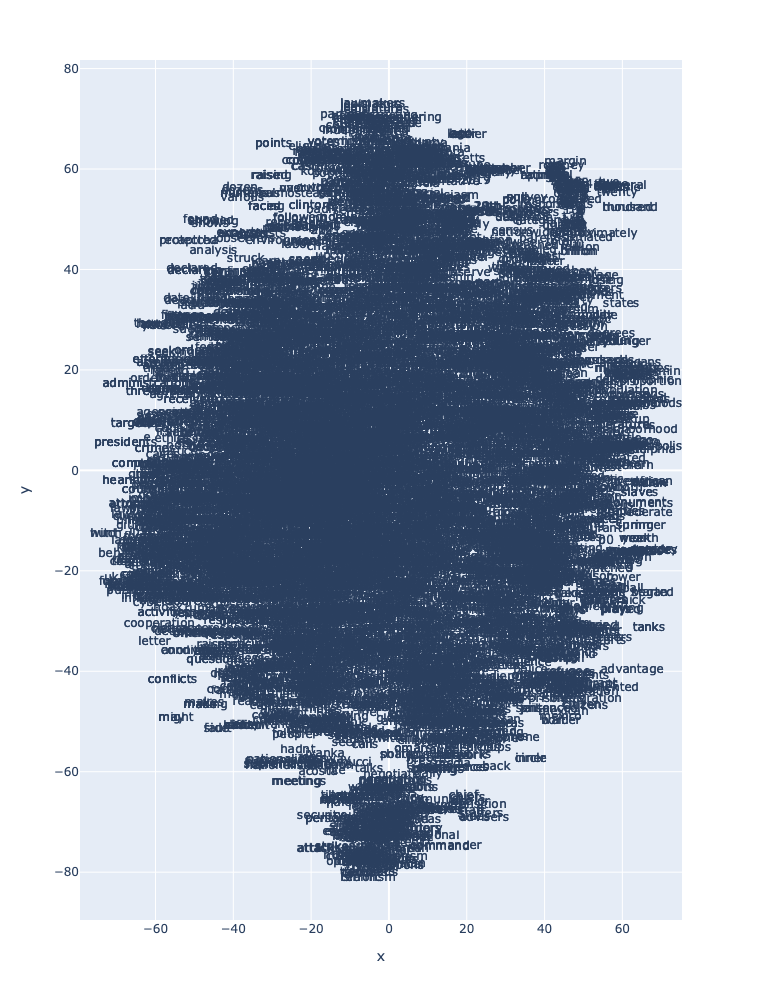

In [13]:
px.scatter(coords, 'x', 'y', text='label', height=1000).update_traces(mode='text')
#The plot is huge so you have to zoom in 

### Find Similar Words

In [21]:
model.wv.most_similar('abortion')

[('reproductive', 0.6717191934585571),
 ('abortions', 0.6716753244400024),
 ('parenthood', 0.6368436217308044),
 ('pregnancy', 0.6241863965988159),
 ('gay', 0.574938952922821),
 ('roe', 0.5394594669342041),
 ('marriage', 0.5368026494979858),
 ('marijuana', 0.5324945449829102),
 ('sex', 0.5241678357124329),
 ('amendment', 0.5128672122955322)]

In [22]:
model.wv.most_similar('russia')

[('russias', 0.766516387462616),
 ('ukraine', 0.7228409051895142),
 ('kremlin', 0.7202196717262268),
 ('putin', 0.7185733914375305),
 ('russians', 0.7064247727394104),
 ('putins', 0.6982231140136719),
 ('russian', 0.6945239305496216),
 ('moscow', 0.6579785943031311),
 ('collusion', 0.6251879930496216),
 ('hacking', 0.5910617113113403)]

In [23]:
model.wv.most_similar('gun')

[('guns', 0.6365745067596436),
 ('nra', 0.5454477667808533),
 ('firearms', 0.5220328569412231),
 ('abortion', 0.4736318290233612),
 ('smoking', 0.40441441535949707),
 ('marijuana', 0.3988878130912781),
 ('shooting', 0.3945476710796356),
 ('vegas', 0.39053648710250854),
 ('birth', 0.3881128132343292),
 ('pot', 0.3636631667613983)]

## Run word2vec on separate publications

In [14]:
TOKEN_powerline = TOKEN[TOKEN['doc_source'] == 'PowerLine']
TOKEN_kos = TOKEN[TOKEN['doc_source'] == 'Daily Kos']
TOKEN_politico = TOKEN[TOKEN['doc_source'] == 'Politico Magazine']

In [15]:
corpus_powerline = TOKEN_powerline[~TOKEN_powerline.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [16]:
corpus_kos = TOKEN_kos[~TOKEN_kos.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [17]:
corpus_politico = TOKEN_politico[~TOKEN_politico.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [18]:
model_powerline = word2vec.Word2Vec(corpus_powerline, size=246, window=window, min_count=200, workers=4)
model_kos = word2vec.Word2Vec(corpus_kos, size=246, window=window, min_count=200, workers=4)
model_politico = word2vec.Word2Vec(corpus_politico, size=246, window=window, min_count=200, workers=4)

In [19]:
coords_powerline = pd.DataFrame(index=range(len(model_powerline.wv.vocab)))
coords_powerline['label'] = [w for w in model_powerline.wv.vocab]
coords_powerline['vector'] = coords_powerline['label'].apply(lambda x: model_powerline.wv.get_vector(x))

In [20]:
coords_kos = pd.DataFrame(index=range(len(model_kos.wv.vocab)))
coords_kos['label'] = [w for w in model_kos.wv.vocab]
coords_kos['vector'] = coords_kos['label'].apply(lambda x: model_kos.wv.get_vector(x))

In [21]:
coords_politico = pd.DataFrame(index=range(len(model_politico.wv.vocab)))
coords_politico['label'] = [w for w in model_politico.wv.vocab]
coords_politico['vector'] = coords_politico['label'].apply(lambda x: model_politico.wv.get_vector(x))

In [22]:
tsne_values_powerline = tsne_model.fit_transform(coords_powerline['vector'].tolist())
tsne_values_kos = tsne_model.fit_transform(coords_kos['vector'].tolist())
tsne_values_politico = tsne_model.fit_transform(coords_politico['vector'].tolist())

In [23]:
coords_powerline['x'] = tsne_values_powerline[:,0]
coords_powerline['y'] = tsne_values_powerline[:,1]
coords_kos['x'] = tsne_values_kos[:,0]
coords_kos['y'] = tsne_values_kos[:,1]
coords_politico['x'] = tsne_values_politico[:,0]
coords_politico['y'] = tsne_values_politico[:,1]

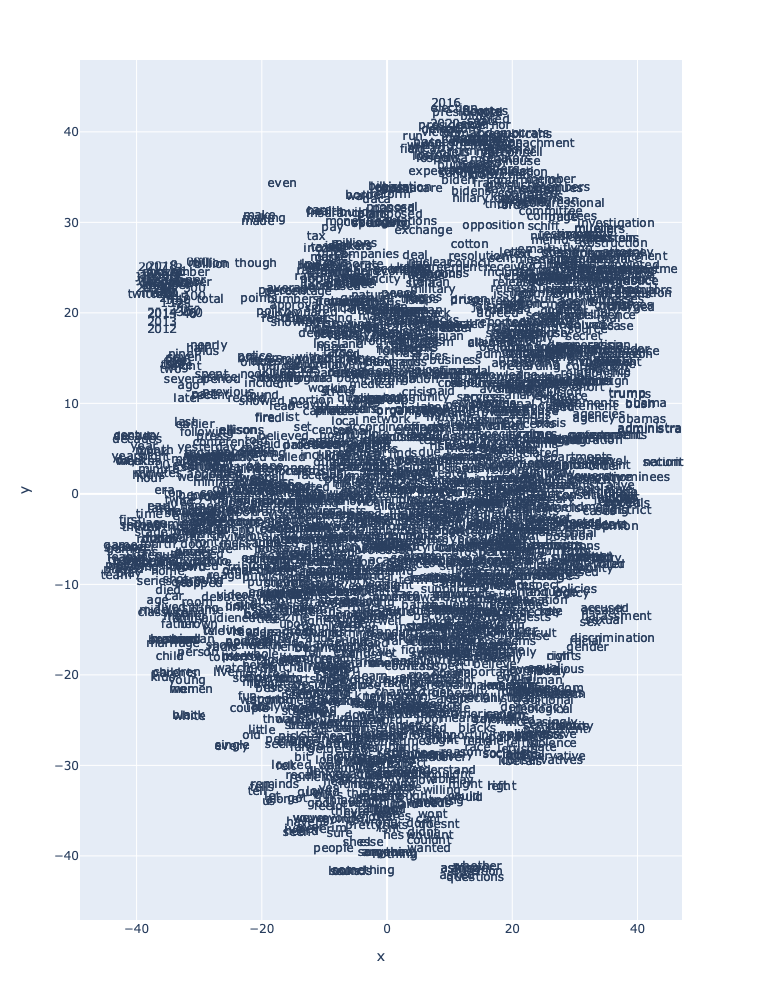

In [24]:
#PowerLine
px.scatter(coords_powerline, 'x', 'y', text='label', height=1000).update_traces(mode='text')

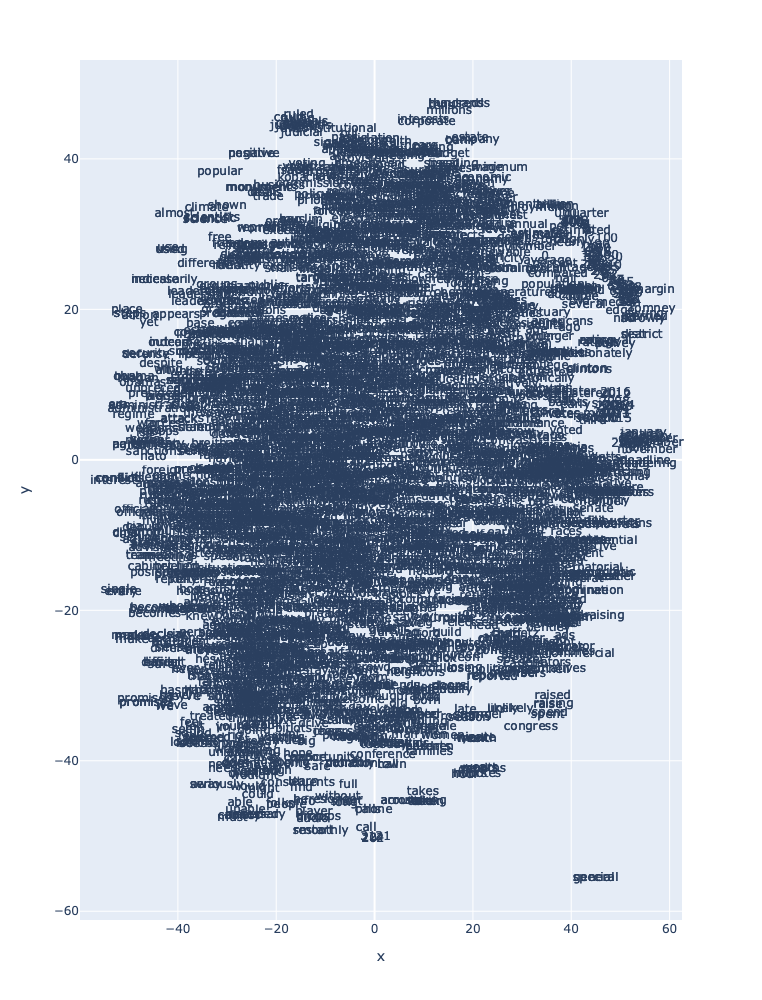

In [25]:
px.scatter(coords_kos, 'x', 'y', text='label', height=1000).update_traces(mode='text')

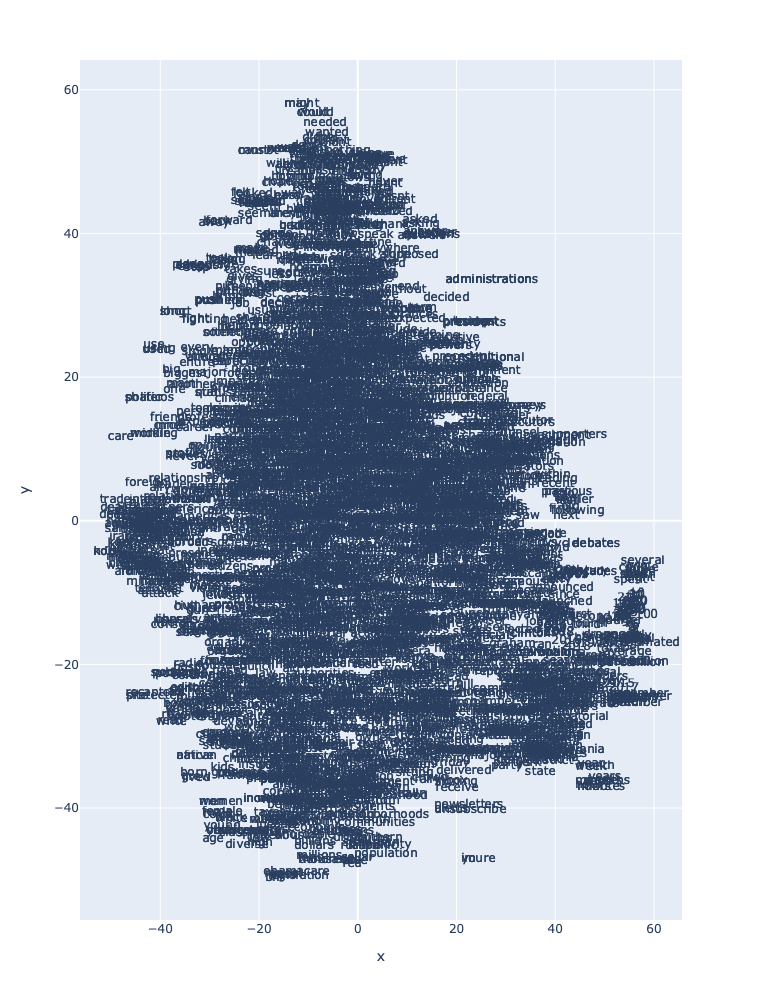

In [26]:
px.scatter(coords_politico, 'x', 'y', text='label', height=1000).update_traces(mode='text')

### Analogies and Similar Words for Separate Models

In [27]:
def complete_analogy(A, B, C, model, n=2):
    try:
        return model.wv.most_similar(positive=[B, C], negative=[A])[0:n]
    except KeyError as e:
        print('Error:', e)
        return None

In [51]:
complete_analogy('republican', 'conservatives', 'democrat', model_powerline)

[('leftists', 0.8158089518547058), ('liberals', 0.8010498285293579)]

In [50]:
complete_analogy('republican', 'conservatives', 'democrat', model_kos)

[('liberal', 0.47353971004486084), ('moderate', 0.4554070830345154)]

In [52]:
complete_analogy('republican', 'conservatives', 'democrat', model_politico)

[('liberals', 0.6806657314300537), ('liberal', 0.5744773149490356)]

In [34]:
complete_analogy('trump', 'leader', 'hillary', model_politico)

[('jackson', 0.43816041946411133), ('socialist', 0.43675678968429565)]

In [35]:
complete_analogy('trump','leader', 'hillary', model_powerline)

[('candidate', 0.6812428832054138), ('elected', 0.6496683955192566)]

In [36]:
complete_analogy('trump','leader', 'hillary', model_kos) #can't explain this one

[('voices', 0.4369434714317322), ('nazis', 0.42913568019866943)]

In [ ]:
complete_analogy('','president', 'hillary', model_powerline)

In [53]:
model_powerline.wv.most_similar('abortion')

[('vast', 0.7864096164703369),
 ('majority', 0.772020697593689),
 ('favor', 0.7577325701713562),
 ('minority', 0.7376528978347778),
 ('appeal', 0.7151576280593872),
 ('discrimination', 0.7082685232162476),
 ('laws', 0.7079459428787231),
 ('voting', 0.6996097564697266),
 ('equal', 0.6937968730926514),
 ('opposed', 0.6889535784721375)]

In [54]:
model_kos.wv.most_similar('abortion')

[('abortions', 0.8169790506362915),
 ('parenthood', 0.7849029302597046),
 ('marriage', 0.690322756767273),
 ('sex', 0.6794038414955139),
 ('marijuana', 0.6715628504753113),
 ('reproductive', 0.6665366888046265),
 ('gay', 0.6206400394439697),
 ('medical', 0.6038463115692139),
 ('transgender', 0.585685133934021),
 ('treatment', 0.5841865539550781)]

In [55]:
model_politico.wv.most_similar('abortion')

[('gay', 0.7481039762496948),
 ('amendment', 0.705410361289978),
 ('marriage', 0.6943181753158569),
 ('advocates', 0.6764551997184753),
 ('discrimination', 0.6618615388870239),
 ('gun', 0.656200647354126),
 ('marijuana', 0.6485593318939209),
 ('laws', 0.6160837411880493),
 ('pro', 0.6149240732192993),
 ('favor', 0.6131260395050049)]

In [58]:
model_powerline.wv.most_similar('trump')

[('trumps', 0.7490745782852173),
 ('ukraine', 0.67393958568573),
 ('putin', 0.6468974351882935),
 ('obama', 0.6184786558151245),
 ('bidens', 0.6043789386749268),
 ('bush', 0.589969277381897),
 ('russia', 0.574524462223053),
 ('russias', 0.5706238150596619),
 ('russians', 0.5690822601318359),
 ('ambassador', 0.5643205642700195)]

In [59]:
model_kos.wv.most_similar('trump')

[('trumps', 0.6600246429443359),
 ('pence', 0.5474344491958618),
 ('donald', 0.4873017370700836),
 ('obama', 0.47863781452178955),
 ('conway', 0.4777171313762665),
 ('spicer', 0.469214528799057),
 ('priebus', 0.4640423059463501),
 ('flynn', 0.46025437116622925),
 ('collusion', 0.45767325162887573),
 ('hillary', 0.456498384475708)]

In [60]:
model_politico.wv.most_similar('trump')

[('trumps', 0.6662648916244507),
 ('presidents', 0.4789920449256897),
 ('bannon', 0.45758217573165894),
 ('obama', 0.4506843686103821),
 ('president', 0.4458730220794678),
 ('pence', 0.44371968507766724),
 ('putin', 0.4240370988845825),
 ('giuliani', 0.4224691390991211),
 ('surprise', 0.41905879974365234),
 ('apparently', 0.41216322779655457)]

In [61]:
model_powerline.wv.most_similar('racism')

[('cultural', 0.8084682822227478),
 ('hatred', 0.8060653805732727),
 ('racist', 0.8046135306358337),
 ('moral', 0.7587525248527527),
 ('color', 0.7517317533493042),
 ('culture', 0.7410680055618286),
 ('self', 0.7391220331192017),
 ('racial', 0.7381859421730042),
 ('white', 0.7310957908630371),
 ('violence', 0.7204754948616028)]

In [62]:
model_kos.wv.most_similar('racism')

[('hatred', 0.8462188243865967),
 ('supremacy', 0.8066338300704956),
 ('identity', 0.7819242477416992),
 ('culture', 0.7742460370063782),
 ('beliefs', 0.7624204754829407),
 ('slavery', 0.7580623626708984),
 ('racial', 0.7298402786254883),
 ('rhetoric', 0.705659031867981),
 ('nazis', 0.7054791450500488),
 ('belief', 0.7007908225059509)]

In [63]:
model_politico.wv.most_similar('racism')

[('racist', 0.7429620027542114),
 ('deeply', 0.7309617400169373),
 ('racial', 0.698844313621521),
 ('identity', 0.6772559881210327),
 ('nationalist', 0.6739980578422546),
 ('anger', 0.6699665188789368),
 ('jews', 0.6506395936012268),
 ('muslims', 0.6384544372558594),
 ('religious', 0.6358627080917358),
 ('ideology', 0.6353315114974976)]

### Add Embeddings to VOCAB Table

In [10]:
VOCAB = pd.read_csv('VOCAB2.csv', index_col='term_id')

In [11]:
VOCAB

term_rank   term_str      n  stop     p_stem pos_max  tfidf_sum  \
term_id                                                                    
156760          18      trump  98906     0      trump     NNP -23.890029   
108856          39        one  52455     0        one      NN -27.438750   
169303          41      would  52065     0      would      VB -12.930989   
119967          48  president  41675     0     presid     NNP  -0.698472   
133361          55       said  38505     0       said      IN   1.033462   
...            ...        ...    ...   ...        ...     ...        ...   
131257       29455       robs     16     0        rob      DT   0.142270   
167109       29456   whitmire     16     0    whitmir     NNP   0.034733   
10865        29457   antelope     16     0    antelop     NNP   0.077299   
108282       29458   offshoot     16     0   offshoot      IN   0.145320   
28045        29459  champaign     16     0  champaign      CC   0.124014   

         tfidf_mean          h  term_entropy  
term_id                                       
156760    -0.000967  13.956830     40.340427  
108856    -0.001111  14.027560     51.390833  
169303    -0.000524  13.861281     51.474865  
119967    -0.000028  13.610333     52.688334  
133361     0.000042  13.562481     54.349380  
...             ...        ...           ...  
131257     0.000006   3.906891     40.204322  
167109     0.000001   2.321928     23.894156  
10865      0.000003   3.700440     38.080066  
108282     0.000006   4.000000     41.162883  
28045      0.000005   3.807355     39.180556  

[29299 rows x 10 columns]

In [12]:
coords = coords.rename(columns={'label':'term_str'})

In [13]:
coords = coords[['term_str', 'vector']]

In [14]:
coords

term_str                                             vector
0        strong  [0.70956546, -0.188749, -0.3241165, -0.7607757...
1       falling  [0.43685094, 0.05655428, -0.7426781, -0.054018...
2           tax  [-0.48292848, -0.44253328, 1.9492328, -0.15814...
3         rates  [-0.20516251, 0.21026938, 0.24795322, 0.535642...
4         among  [0.08137097, -0.5150374, -0.3865643, 0.4883729...
...         ...                                                ...
5811  recaptcha  [2.547548, 0.31524265, -1.2549214, 0.48150593,...
5812       noor  [-0.1990686, -0.13076684, -0.6185836, -0.50530...
5813     strzok  [-0.3328395, -0.18527536, -0.5151179, -0.23863...
5814      omars  [0.19778971, 0.73948383, -1.6321661, -0.993037...
5815     grrrll  [0.23897097, 0.5501943, 0.0262677, -0.1383965,...

[5816 rows x 2 columns]

In [15]:
VOCAB = VOCAB.reset_index().merge(coords, how='left', on='term_str').set_index('term_id')

In [16]:
VOCAB = VOCAB.rename(columns={'vector':'embeddings'})

In [17]:
VOCAB.head()

term_rank   term_str      n  stop  p_stem pos_max  tfidf_sum  \
term_id                                                                 
156760          18      trump  98906     0   trump     NNP -23.890029   
108856          39        one  52455     0     one      NN -27.438750   
169303          41      would  52065     0   would      VB -12.930989   
119967          48  president  41675     0  presid     NNP  -0.698472   
133361          55       said  38505     0    said      IN   1.033462   

         tfidf_mean          h  term_entropy  \
term_id                                        
156760    -0.000967  13.956830     40.340427   
108856    -0.001111  14.027560     51.390833   
169303    -0.000524  13.861281     51.474865   
119967    -0.000028  13.610333     52.688334   
133361     0.000042  13.562481     54.349380   

                                                embeddings  
term_id                                                     
156760   [0.1253267, 0.60008496, -0.22160935, 0.7152763...  
108856   [-0.35915372, 0.11899874, -0.18927407, -0.5012...  
169303   [-1.3689595, -0.38038722, -0.561765, -0.633151...  
119967   [-0.18222935, 1.5771084, 0.4546457, -0.3001194...  
133361   [0.62887394, 0.40462017, 0.24808976, -2.205499...

In [18]:
VOCAB.to_csv('VOCAB2.csv')